In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

results_piqa = []

tests = ['piqa-en', 'piqa-mk', 'piqa-bg', 'piqa-sl', 'piqa-sr_cyrl', 'piqa-hr', 'piqa-sr_latn', 'piqa-bs', 'piqa-sl-cer', 'piqa-hr-ckm']

lang_map = {
    "English": "en",
    "Croatian": "hr",
    "Serbian (latin)": "sr_latn",
    "Serbian (cyrillic)": "sr_cyrl",
    "Slovenian": "sl",
    "Bosnian": "bs",
    "Bulgarian": "bg",
    "Chakavian Dialect": "hr-ckm",
    "Macedonian": "mk",
    "Cerkno Dialect": "sl-cer",
}

for x in results:
    cur_result = {}
    cur_result["Model"] = x["Model"]
    for lang in ["English", "Croatian", "Serbian (latin)", "Serbian (cyrillic)", "Slovenian", "Bosnian", "Bulgarian", "Macedonian", "Chakavian Dialect", "Cerkno Dialect"]:
        lang_code = lang_map[lang]
        if lang_code in x['Language-Specific Scores']:
            cur_result[f"{lang} (accuracy)"] = x['Language-Specific Scores'][lang_code]["Accuracy"]
    results_piqa.append(cur_result)

temp_results_df = pd.DataFrame(results_piqa)

merged_results = []

temp_results = temp_results_df.to_dict(orient="records")

for model in list(temp_results_df.Model.unique()):
	model_dict = {}
	model_dict["Model"] = model
	for x in temp_results:
		if x["Model"] == model:
			for lang in ["English", "Croatian", "Serbian (latin)", "Serbian (cyrillic)", "Slovenian", "Bosnian", "Bulgarian", "Macedonian", "Chakavian Dialect", "Cerkno Dialect"]:
				if x[f"{lang} (accuracy)"] >= 0:
					model_dict[f"{lang} (accuracy)"] = x[f"{lang} (accuracy)"]
	merged_results.append(model_dict)

results_df = pd.DataFrame(merged_results)
results_df

,Model,Macedonian (accuracy),English (accuracy),Chakavian Dialect (accuracy),Serbian (latin) (accuracy),Slovenian (accuracy),Cerkno Dialect (accuracy),Serbian (cyrillic) (accuracy),Bulgarian (accuracy),Croatian (accuracy),Bosnian (accuracy)
0,deepseek-r1:14b,0.57,0.63,0.50,0.60,0.48,0.50,0.60,0.55,0.60,0.73
1,gemma3:27b,0.90,0.84,0.48,0.92,0.87,0.57,0.84,0.92,0.94,1.00
2,llama3.3:latest,0.95,0.91,0.53,0.87,0.83,0.54,0.89,0.94,0.89,1.00
3,qwen3:32b,0.86,0.93,0.54,0.85,0.75,0.49,0.85,0.93,0.90,0.97
4,gpt-3.5-turbo-0125,0.80,0.86,0.49,0.79,0.78,0.50,0.74,0.78,0.88,0.99
5,gpt-4o-2024-08-06,1.00,0.97,0.59,0.98,0.97,0.78,0.95,0.97,0.99,1.00
6,gpt-5-2025-08-07,1.00,0.97,0.76,0.99,0.99,0.88,0.96,0.97,1.00,1.00
7,mistralai/mistral-medium-3.1,0.92,0.94,0.53,0.93,0.86,0.62,0.97,0.95,0.96,1.00
8,google/gemini-2.5-flash,0.99,0.94,0.61,0.94,0.96,0.77,0.95,0.96,0.99,1.00
9,anthropic/claude-haiku-4.5,0.94,0.91,0.50,0.94,0.89,0.57,0.96,0.96,0.98,1.00


In [3]:
results_df.to_json("results.json", orient="records", lines=True)

# Plot a bar plot

In [4]:
import pandas as pd

results_df = pd.read_json("results.json", orient="records", lines=True)

results_df

,Model,Macedonian (accuracy),English (accuracy),Chakavian Dialect (accuracy),Serbian (latin) (accuracy),Slovenian (accuracy),Cerkno Dialect (accuracy),Serbian (cyrillic) (accuracy),Bulgarian (accuracy),Croatian (accuracy),Bosnian (accuracy)
0,deepseek-r1:14b,0.57,0.63,0.50,0.60,0.48,0.50,0.60,0.55,0.60,0.73
1,gemma3:27b,0.90,0.84,0.48,0.92,0.87,0.57,0.84,0.92,0.94,1.00
2,llama3.3:latest,0.95,0.91,0.53,0.87,0.83,0.54,0.89,0.94,0.89,1.00
3,qwen3:32b,0.86,0.93,0.54,0.85,0.75,0.49,0.85,0.93,0.90,0.97
4,gpt-3.5-turbo-0125,0.80,0.86,0.49,0.79,0.78,0.50,0.74,0.78,0.88,0.99
5,gpt-4o-2024-08-06,1.00,0.97,0.59,0.98,0.97,0.78,0.95,0.97,0.99,1.00
6,gpt-5-2025-08-07,1.00,0.97,0.76,0.99,0.99,0.88,0.96,0.97,1.00,1.00
7,mistralai/mistral-medium-3.1,0.92,0.94,0.53,0.93,0.86,0.62,0.97,0.95,0.96,1.00
8,google/gemini-2.5-flash,0.99,0.94,0.61,0.94,0.96,0.77,0.95,0.96,0.99,1.00
9,anthropic/claude-haiku-4.5,0.94,0.91,0.50,0.94,0.89,0.57,0.96,0.96,0.98,1.00


In [5]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy (Frequent)",
    "X-GENRE classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
    "XLM-R-ParlaSent": "Fine-Tuned BERT-Like Model",
    "gpt-5-mini-2025-08-07": "GPT-5-mini",
    "gpt-5": "GPT-5",
    "gpt-5-2025-08-07": "GPT-5",
    "gpt-5-nano-2025-08-07": "GPT-5-Nano",
    "llama4:scout": "LLaMA 4 Scout",
    "qwen3:32b": "Qwen 3",
    'google/gemini-2.5-flash-lite': "Gemini 2.5 Flash Lite",
    'google/gemini-2.5-flash': "Gemini 2.5 Flash",
    'google/gemini-2.5-pro': "Gemini 2.5 Pro",
    'mistralai/mistral-medium-3.1': "Mistral Medium 3.1",
    'mistralai/mistral-small-3.2-24b-instruct': "Mistral Small 3.2",
    'cohere/command-a': "Command A",
    "anthropic/claude-haiku-4.5": "Claude Haiku 4.5"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

# Change the order of columns


results_df = results_df[['Model', 'English (accuracy)', 'Slovenian (accuracy)','Croatian (accuracy)','Serbian (latin) (accuracy)','Serbian (cyrillic) (accuracy)', 'Bosnian (accuracy)', 'Bulgarian (accuracy)', 'Macedonian (accuracy)','Cerkno Dialect (accuracy)','Chakavian Dialect (accuracy)']]

results_df

,Model,English (accuracy),Slovenian (accuracy),Croatian (accuracy),Serbian (latin) (accuracy),Serbian (cyrillic) (accuracy),Bosnian (accuracy),Bulgarian (accuracy),Macedonian (accuracy),Cerkno Dialect (accuracy),Chakavian Dialect (accuracy)
0,DeepSeek-R1-Distill,0.63,0.48,0.60,0.60,0.60,0.73,0.55,0.57,0.50,0.50
1,Gemma 3,0.84,0.87,0.94,0.92,0.84,1.00,0.92,0.90,0.57,0.48
2,LLaMA 3.3,0.91,0.83,0.89,0.87,0.89,1.00,0.94,0.95,0.54,0.53
3,Qwen 3,0.93,0.75,0.90,0.85,0.85,0.97,0.93,0.86,0.49,0.54
4,GPT-3.5-Turbo,0.86,0.78,0.88,0.79,0.74,0.99,0.78,0.80,0.50,0.49
5,GPT-4o,0.97,0.97,0.99,0.98,0.95,1.00,0.97,1.00,0.78,0.59
6,GPT-5,0.97,0.99,1.00,0.99,0.96,1.00,0.97,1.00,0.88,0.76
7,Mistral Medium 3.1,0.94,0.86,0.96,0.93,0.97,1.00,0.95,0.92,0.62,0.53
8,Gemini 2.5 Flash,0.94,0.96,0.99,0.94,0.95,1.00,0.96,0.99,0.77,0.61
9,Claude Haiku 4.5,0.91,0.89,0.98,0.94,0.96,1.00,0.96,0.94,0.57,0.50


In [6]:
print(results_df.sort_values(by="Croatian (accuracy)", ascending=False).to_markdown(index=False))

| Model               |   English (accuracy) |   Slovenian (accuracy) |   Croatian (accuracy) |   Serbian (latin) (accuracy) |   Serbian (cyrillic) (accuracy) |   Bosnian (accuracy) |   Bulgarian (accuracy) |   Macedonian (accuracy) |   Cerkno Dialect (accuracy) |   Chakavian Dialect (accuracy) |
|:--------------------|---------------------:|-----------------------:|----------------------:|-----------------------------:|--------------------------------:|---------------------:|-----------------------:|------------------------:|----------------------------:|-------------------------------:|
| GPT-5               |                 0.97 |                   0.99 |                  1    |                         0.99 |                            0.96 |                 1    |                   0.97 |                    1    |                        0.88 |                           0.76 |
| GPT-4o              |                 0.97 |                   0.97 |                  0.99 |           

<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

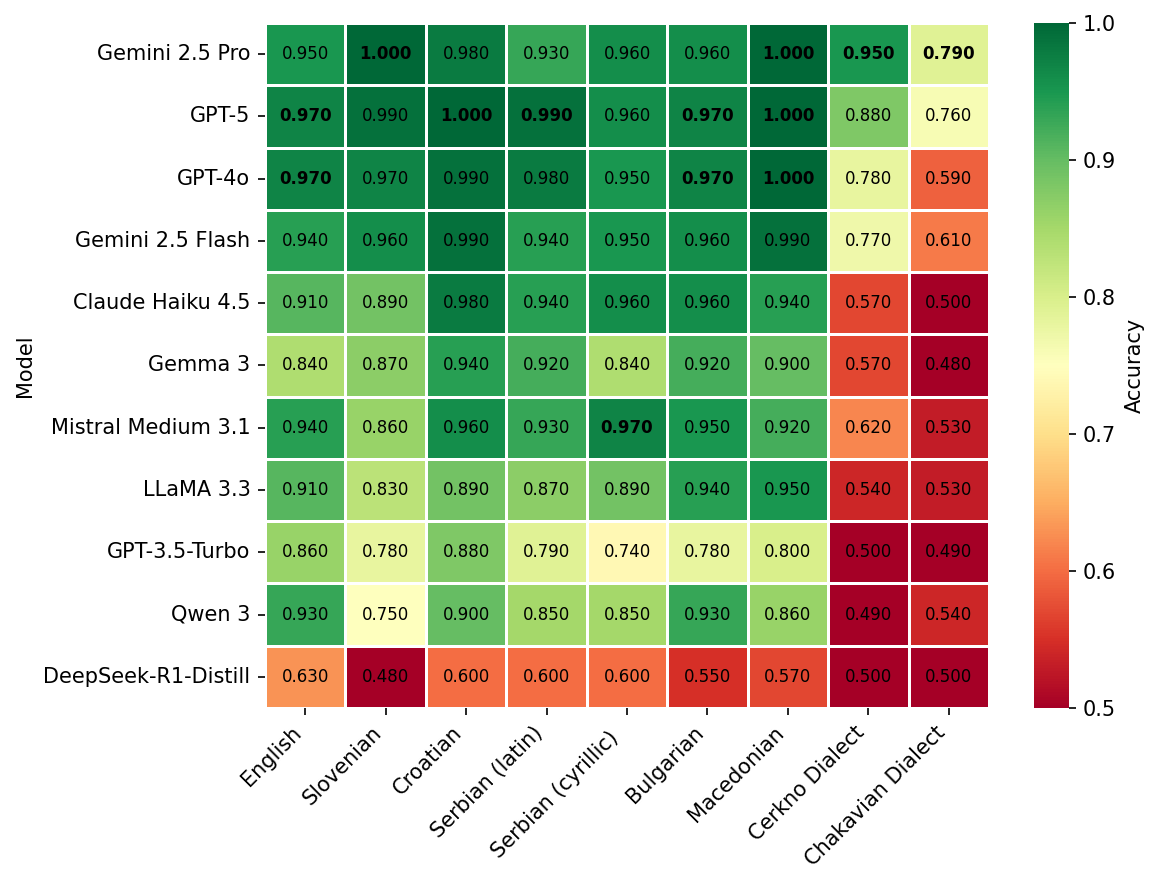

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=150)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Slovenian (accuracy)", ascending=False)

# Rename columns
data.rename(columns={'English (accuracy)':'English', 'Slovenian (accuracy)':'Slovenian', 'Croatian (accuracy)':'Croatian','Serbian (latin) (accuracy)': 'Serbian (latin)', 'Serbian (cyrillic) (accuracy)': 'Serbian (cyrillic) ', 'Bosnian (accuracy)': 'Bosnian', 'Bulgarian (accuracy)': 'Bulgarian', 'Macedonian (accuracy)': 'Macedonian', 'Cerkno Dialect (accuracy)': 'Cerkno Dialect', 'Chakavian Dialect (accuracy)': 'Chakavian Dialect'}, inplace=True)

# Remove Bosnian
data.drop(columns=["Bosnian"], inplace=True)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0.5,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Accuracy'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig("piqa-results-heatmap.png", dpi=300)
plt


In [8]:
print(results_df.Model.to_list())

['DeepSeek-R1-Distill', 'Gemma 3', 'LLaMA 3.3', 'Qwen 3', 'GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Gemini 2.5 Flash', 'Claude Haiku 4.5', 'Gemini 2.5 Pro']


In [9]:
# GPT comparison

results_gpt = results_df[~results_df["Model"].isin(["Dummy (Frequent)",])]#'DeepSeek-R1-Distill'])]

results_transposed = results_gpt.set_index(results_gpt["Model"]).drop(columns=["Model"]).transpose()

# Set the order
results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Claude Haiku 4.5', 'Gemini 2.5 Flash', 'Gemini 2.5 Pro', 'Gemma 3', 'LLaMA 3.3', 'Qwen 3', 'Claude Haiku 4.5']]

results_transposed

Model,GPT-3.5-Turbo,GPT-4o,GPT-5,Mistral Medium 3.1,Claude Haiku 4.5,Gemini 2.5 Flash,Gemini 2.5 Pro,Gemma 3,LLaMA 3.3,Qwen 3,Claude Haiku 4.5
English (accuracy),0.86,0.97,0.97,0.94,0.91,0.94,0.95,0.84,0.91,0.93,0.91
Slovenian (accuracy),0.78,0.97,0.99,0.86,0.89,0.96,1.00,0.87,0.83,0.75,0.89
Croatian (accuracy),0.88,0.99,1.00,0.96,0.98,0.99,0.98,0.94,0.89,0.90,0.98
Serbian (latin) (accuracy),0.79,0.98,0.99,0.93,0.94,0.94,0.93,0.92,0.87,0.85,0.94
Serbian (cyrillic) (accuracy),0.74,0.95,0.96,0.97,0.96,0.95,0.96,0.84,0.89,0.85,0.96
Bosnian (accuracy),0.99,1.00,1.00,1.00,1.00,1.00,0.98,1.00,1.00,0.97,1.00
Bulgarian (accuracy),0.78,0.97,0.97,0.95,0.96,0.96,0.96,0.92,0.94,0.93,0.96
Macedonian (accuracy),0.80,1.00,1.00,0.92,0.94,0.99,1.00,0.90,0.95,0.86,0.94
Cerkno Dialect (accuracy),0.50,0.78,0.88,0.62,0.57,0.77,0.95,0.57,0.54,0.49,0.57
Chakavian Dialect (accuracy),0.49,0.59,0.76,0.53,0.50,0.61,0.79,0.48,0.53,0.54,0.50


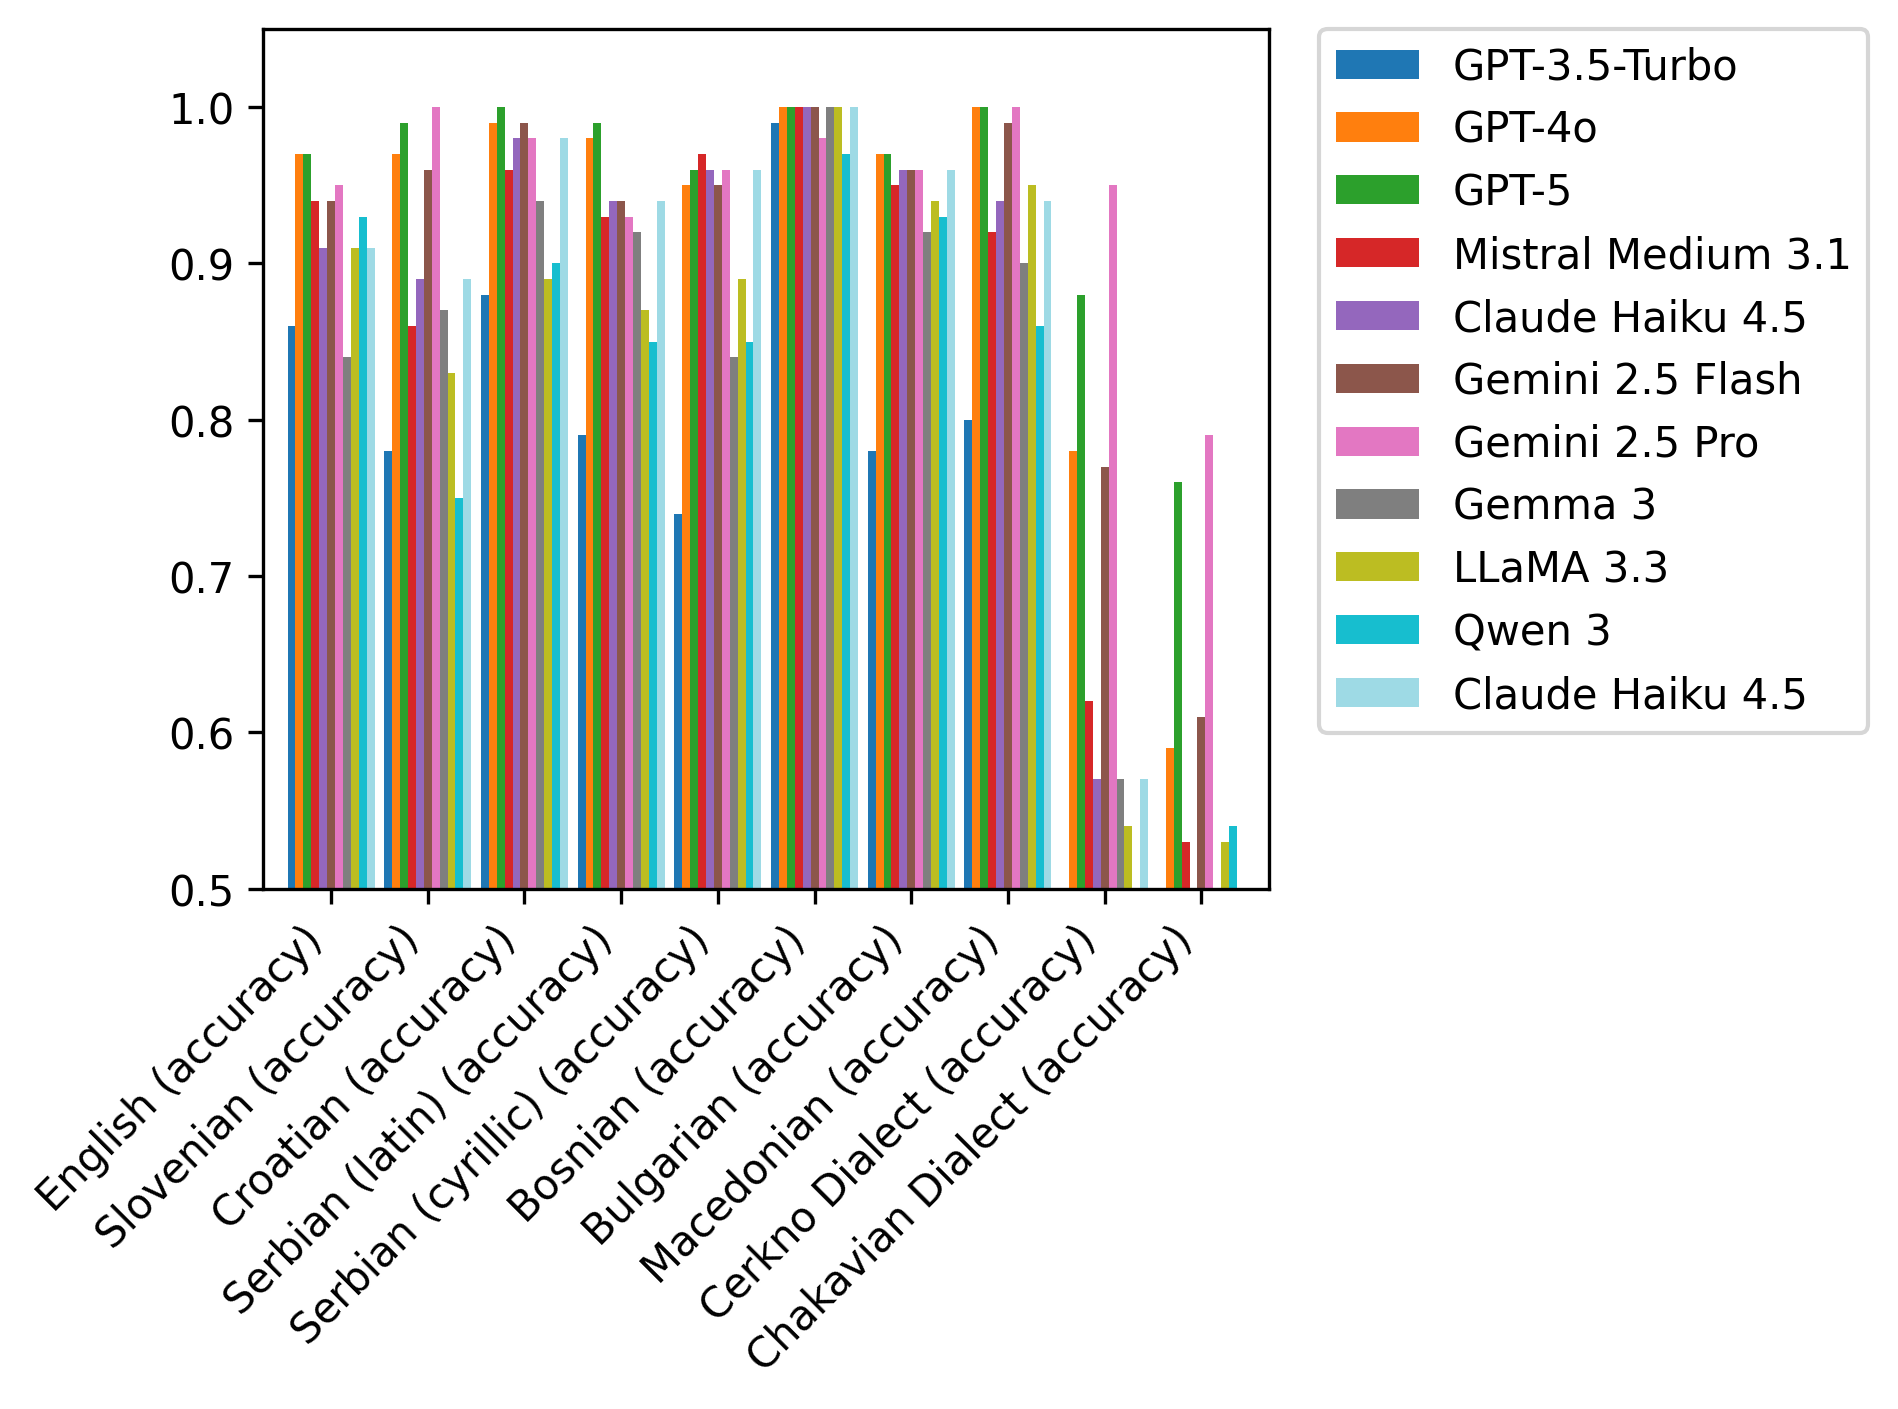

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300 

ax = results_transposed.plot(kind="bar", width=0.9,colormap="tab20")

# Move legend outside
ax.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend to the right
    loc='upper left',          # Anchor point
    borderaxespad=0
)

ax.set_ylim(0.5, None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()  # Adjust layout so nothing is cut off
plt.savefig("gpt_comparison.png", dpi=300)
plt.show()
